In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [8]:
# Load data
df = pd.read_csv('hotels.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [10]:
# Tampilkan 5 baris pertama dari DataFrame
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


Penulis menjalankan perintah isnull().sum() untuk melihat kolom mana saja yang memiliki nilai kosong dan berapa jumlah nilai kosong tersebut.

In [11]:
# Menampilkan jumlah nilai kosong dalam setiap kolom
print(df.isnull().sum())

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Disini penulis hanya membuang baris dengan nilai kosong pada pada kolom yang diperlukan saja, dalam kasus ini yaitu kolom 'country' karena kolom tersebut akan digunakan untuk analisis lebih lanjut.

In [12]:
# Hapus baris yang memiliki nilai NaN pada kolom `country`
df.dropna(subset=['country'], inplace=True)

In [13]:
# Hitung jumlah masing-masing nilai unik pada kolom `market_segment`
market_segment_counts = df['market_segment'].value_counts()

# Tampilkan jumlah masing-masing nilai unik tersebut
print(market_segment_counts.to_markdown(numalign="left", stralign="left"))

| market_segment   | count   |
|:-----------------|:--------|
| Online TA        | 56403   |
| Offline TA/TO    | 24160   |
| Groups           | 19806   |
| Direct           | 12449   |
| Corporate        | 5111    |
| Complementary    | 734     |
| Aviation         | 237     |
| Undefined        | 2       |


Setelah Melakukan eksplorasi data lebih lanjut, penulis menemukan bahwa nilai 'Undefined' pada kolom 'market_segment' hanya berjumlah 2, sehingga penulis memutuskan untuk menghapus baris data dimana nilai tersebut berada pada kolom.

In [14]:
# Hapus semua baris data yang memiliki nilai 'Undefined' pada kolom `market_segment`
df = df[df['market_segment'] != 'Undefined']

# Tampilkan 10 baris pertama dari DataFrame
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


Penulis melakukan encoding agar kemudian bisa dilakukan perhitungan korelasi terhadap kolom 'is_canceled'.

In [15]:
# Buat objek LabelEncoder
le = LabelEncoder()

# Lakukan label encoding pada kolom `market_segment` dan `country`
df['market_segment_encoded'] = le.fit_transform(df['market_segment'])

df['country_encoded'] = le.fit_transform(df['country'])

# Tampilkan 10 baris pertama dari DataFrame
df.head(10)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,market_segment_encoded,country_encoded
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,3,135
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,3,135
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,3,59
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,2,59
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,6,59
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,6,59
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03,3,135
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03,3,135
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06,6,135
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22,5,135


Penulis melakukan perhitungan korelasi untuk memastikan bahwa kolom yang dipilih untuk analisis lebih lanjut relevan. Terlihat bahwa kolom yang dipilih oleh penulis, yaitu 'lead_time', 'country', market_segment', dan 'adr' berada pada peringkat 7 teratas.

In [16]:
# Pilih kolom numerik
numeric_columns = df.select_dtypes(include=['number'])

# Hapus kolom `is_canceled`
numeric_columns = numeric_columns.drop(columns=['is_canceled'])

# Hitung korelasi antara setiap kolom numerik
correlations = numeric_columns.corrwith(df['is_canceled'])

sorted_correlations = correlations.sort_values(ascending=False)

print(sorted_correlations.to_markdown(numalign="left", stralign="left"))

|                                | 0           |
|:-------------------------------|:------------|
| lead_time                      | 0.291967    |
| country_encoded                | 0.270239    |
| previous_cancellations         | 0.109918    |
| adults                         | 0.0583858   |
| market_segment_encoded         | 0.0569387   |
| days_in_waiting_list           | 0.054012    |
| adr                            | 0.0461726   |
| stays_in_week_nights           | 0.0241207   |
| arrival_date_year              | 0.0163756   |
| arrival_date_week_number       | 0.00747366  |
| children                       | 0.00475113  |
| stays_in_weekend_nights        | -0.00262971 |
| arrival_date_day_of_month      | -0.00614333 |
| company                        | -0.0243846  |
| babies                         | -0.0325219  |
| previous_bookings_not_canceled | -0.0554943  |
| agent                          | -0.0819537  |
| is_repeated_guest              | -0.085182   |
| booking_changes   

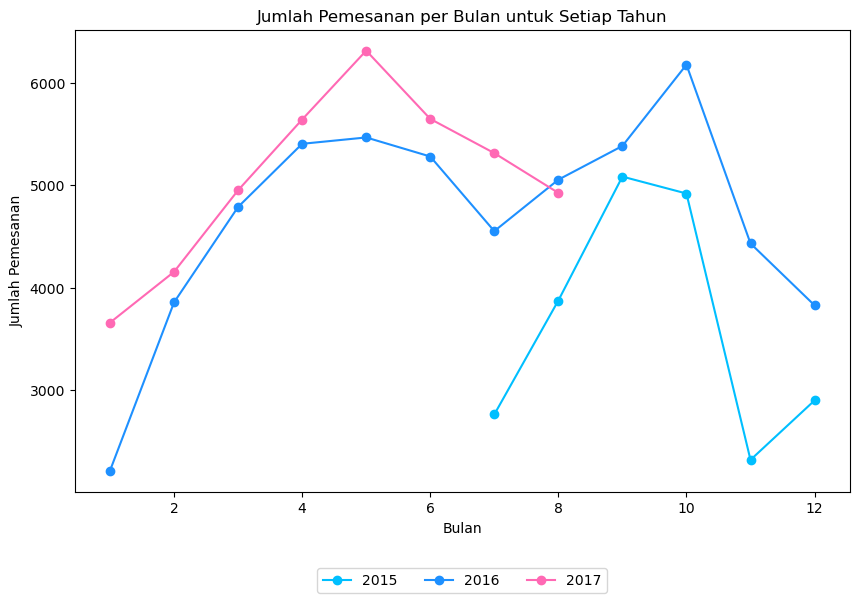

In [17]:
# Gabungkan kolom `arrival_date_year`, `arrival_date_month`, dan `arrival_date_day_of_month` menjadi satu kolom datetime
df['ArrivalDate'] = pd.to_datetime(df[['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']].astype(str).agg('-'.join, axis=1))

# Ekstrak tahun dan bulan dari kolom `ArrivalDate`
df['Year'] = df['ArrivalDate'].dt.year
df['Month'] = df['ArrivalDate'].dt.month

# Hitung jumlah pemesanan yang tidak dibatalkan per bulan untuk setiap tahun
df_agg = df.groupby(['Year', 'Month']).size().reset_index(name='JumlahPemesanan')

fig, ax = plt.subplots(figsize=(10, 6))

colors = {2015: 'deepskyblue', 2016: 'dodgerblue', 2017: 'hotpink'}

# Plot data untuk setiap tahun
for year in df_agg['Year'].unique():
    df_year = df_agg[df_agg['Year'] == year]
    ax.plot(df_year['Month'], df_year['JumlahPemesanan'], marker='o', color=colors[year], label=year)

ax.set_xlabel('Bulan')
ax.set_ylabel('Jumlah Pemesanan')
ax.set_title('Jumlah Pemesanan per Bulan untuk Setiap Tahun')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

plt.show()

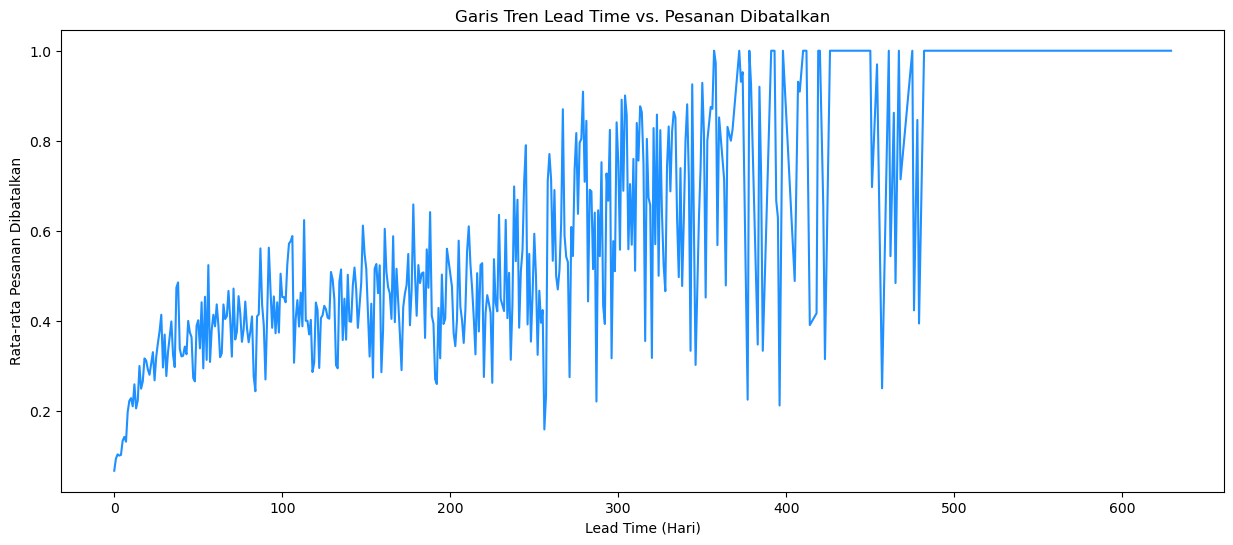

In [18]:
# Hitung jumlah baris dimana `is_canceled` bernilai 1 (canceled) untuk setiap `lead_time`
jumlah_canceled_per_lead_time = df[df['is_canceled'] == 1].groupby('lead_time')['is_canceled'].count()

# Filter data untuk hanya menyertakan `lead_time` dengan jumlah pemesanan yang dicancel lebih dari atau sama dengan 10
lead_time_valid = jumlah_canceled_per_lead_time[jumlah_canceled_per_lead_time >= 10].index

# Filter data awal untuk hanya menyertakan `lead_time` yang valid
df_filtered = df[df['lead_time'].isin(lead_time_valid)]

# Hitung rata-rata `is_canceled` untuk setiap `lead_time`
rata_rata_per_lead_time = df_filtered.groupby('lead_time')['is_canceled'].mean()

# Urutkan nilai rata-rata berdasarkan `lead_time`
rata_rata_per_lead_time = rata_rata_per_lead_time.sort_index()

plt.figure(figsize=(15, 6))

plt.plot(rata_rata_per_lead_time.index, rata_rata_per_lead_time.values, color='dodgerblue')

plt.xlabel('Lead Time (Hari)')
plt.ylabel('Rata-rata Pesanan Dibatalkan')

plt.title('Garis Tren Lead Time vs. Pesanan Dibatalkan')

plt.show()

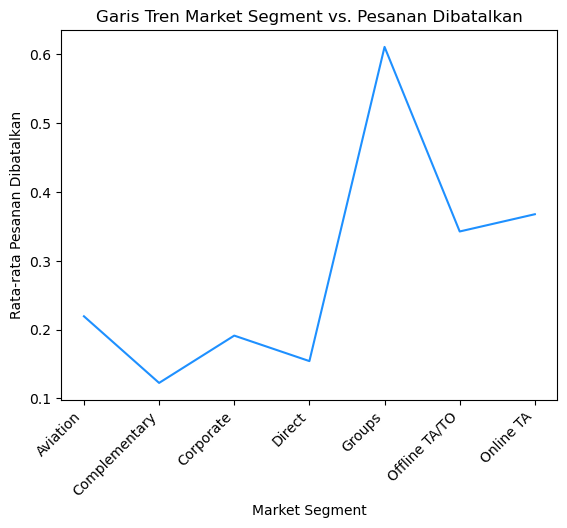

In [19]:
# Menghitung jumlah baris dimana `is_canceled` bernilai 1 (canceled) untuk setiap `market_segment`
jumlah_canceled_per_market_segment = df[df['is_canceled'] == 1].groupby('market_segment')['is_canceled'].count()

# Filter data untuk hanya menyertakan `market_segment` dengan jumlah pemesanan yang dicancel lebih dari atau sama dengan 10
market_segment_valid = jumlah_canceled_per_market_segment[jumlah_canceled_per_market_segment >= 10].index

# Filter data awal untuk hanya menyertakan `market_segment` yang valid
df_filtered = df[df['market_segment'].isin(market_segment_valid)]

# Hitung rata-rata `is_canceled` untuk setiap `market_segment`
rata_rata_per_market_segment = df_filtered.groupby('market_segment')['is_canceled'].mean()

# Urutkan nilai rata-rata berdasarkan `market_segment`
rata_rata_per_market_segment = rata_rata_per_market_segment.sort_index()

plt.xticks(rotation=45, ha='right')

plt.plot(rata_rata_per_market_segment.index, rata_rata_per_market_segment.values, color='dodgerblue')

plt.xlabel('Market Segment')
plt.ylabel('Rata-rata Pesanan Dibatalkan')

plt.title('Garis Tren Market Segment vs. Pesanan Dibatalkan')

plt.show()

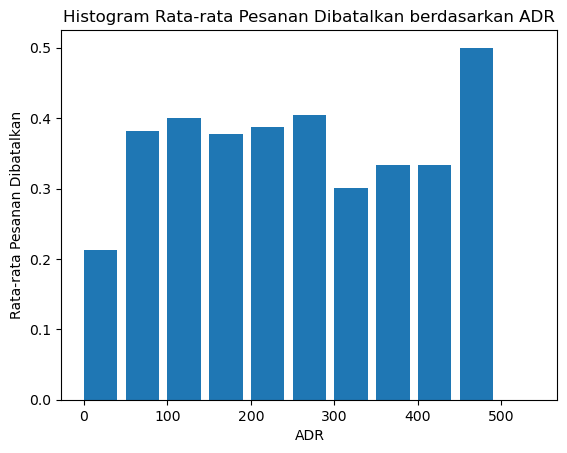

In [20]:
# Buat rentang ADR
max_adr = df['adr'].max()
adr_ranges = range(0, int(max_adr), 50)

# List untuk menyimpan rata-rata 'is_canceled'
avg_canceled = []

# Hitung rata-rata 'is_canceled' untuk setiap rentang 'adr'
for i in range(len(adr_ranges) - 1):
    adr_start = adr_ranges[i]
    adr_end = adr_ranges[i + 1]
    avg_canceled.append(df[(df['adr'] >= adr_start) & (df['adr'] < adr_end)]['is_canceled'].mean())

plt.bar(adr_ranges[:-1], avg_canceled, width=40, align='edge')

plt.xlabel('ADR')
plt.ylabel('Rata-rata Pesanan Dibatalkan')

plt.title('Histogram Rata-rata Pesanan Dibatalkan berdasarkan ADR')

plt.show()

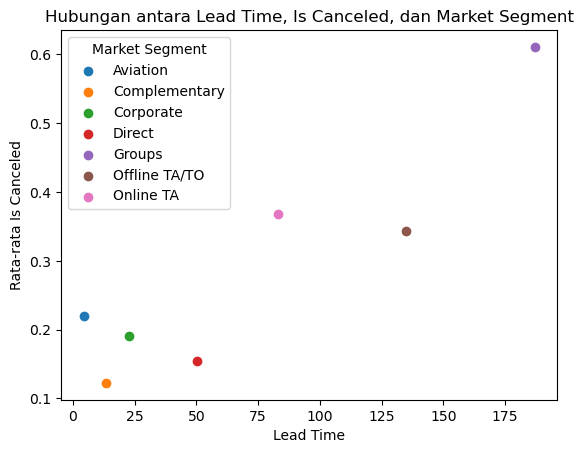

In [21]:
# Hitung nilai rata-rata `lead_time` dan `is_canceled` untuk setiap `market_segment`
rata_rata_per_segment = df.groupby('market_segment').agg({
    'lead_time': 'mean',
    'is_canceled': 'mean'
})

# Ubah hasil perhitungan menjadi dataframe
rata_rata_per_segment = rata_rata_per_segment.reset_index()

# Buat scatter plot dengan warna berbeda untuk setiap market segment
fig, ax = plt.subplots()

# Loop melalui setiap market segment dan plot data
for segment in rata_rata_per_segment['market_segment'].unique():
    segment_data = rata_rata_per_segment[rata_rata_per_segment['market_segment'] == segment]
    ax.scatter(segment_data['lead_time'], segment_data['is_canceled'], label=segment)

ax.set_xlabel('Lead Time')
ax.set_ylabel('Rata-rata Is Canceled')

ax.set_title('Hubungan antara Lead Time, Is Canceled, dan Market Segment')

ax.legend(title='Market Segment')

plt.show()

In [22]:
# Hitung jumlah pemesanan per negara
country_counts = df['country'].value_counts()

# Filter negara yang memiliki jumlah pemesanan lebih dari atau sama dengan 39
filtered_country_counts = country_counts[country_counts >= 39]

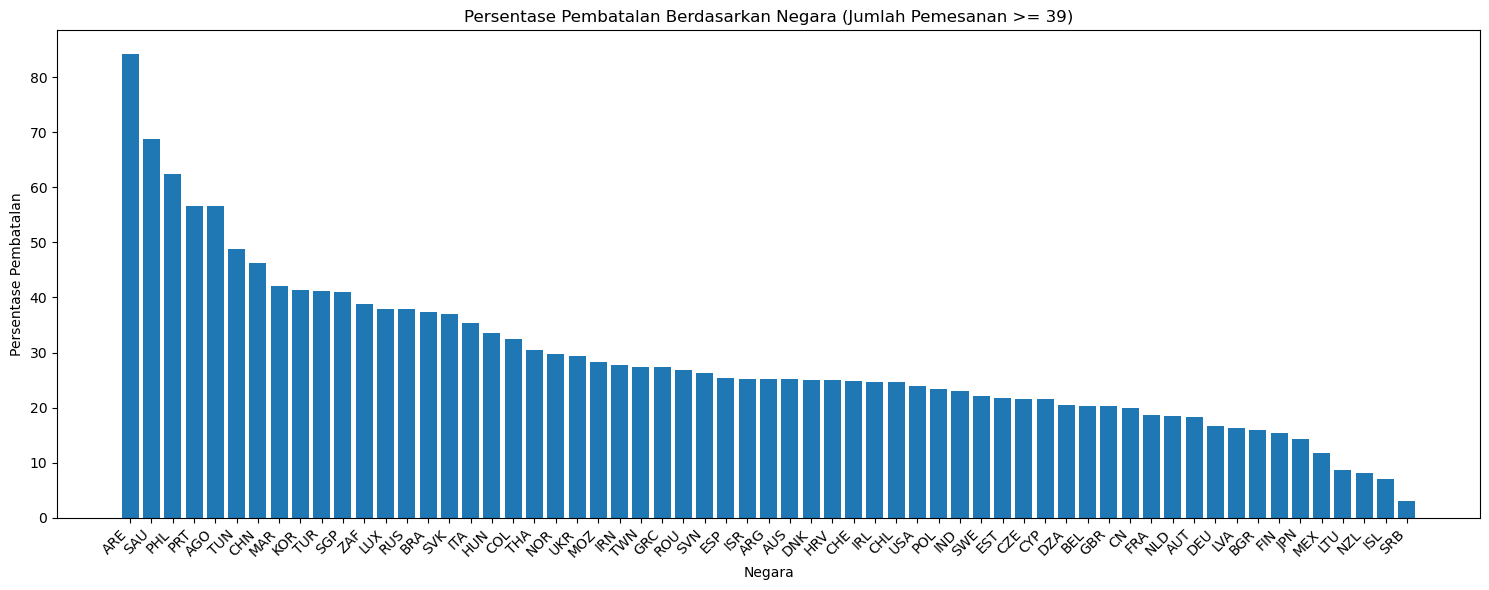

In [23]:
# Hitung jumlah pemesanan dan jumlah pemesanan yang dibatalkan untuk setiap negara
country_counts = df.groupby('country')['is_canceled'].count()
canceled_counts = df[df['is_canceled'] == 1].groupby('country')['is_canceled'].count()

# Hitung persentase pembatalan untuk setiap negara
cancel_percentage = (canceled_counts / country_counts) * 100

# Filter negara yang terdapat dalam filtered_country_counts
cancel_percentage_filtered = cancel_percentage[filtered_country_counts.index]

# Urutkan negara berdasarkan persentase pembatalan secara menurun
cancel_percentage_filtered = cancel_percentage_filtered.sort_values(ascending=False)

# Buat histogram dengan negara di sumbu x dan persentase pembatalan di sumbu y
plt.figure(figsize=(15, 6))
plt.bar(cancel_percentage_filtered.index, cancel_percentage_filtered.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Negara')
plt.ylabel('Persentase Pembatalan')
plt.title('Persentase Pembatalan Berdasarkan Negara (Jumlah Pemesanan >= 39)')
plt.tight_layout()
plt.show()